In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [77]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Genuine','Imposter']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [78]:
data = pd.read_csv("../Data/KeystrokeData.csv", header=1)
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Atharwa,0.083,0.306,0.223,0.088,0.202,0.114,0.058,0.264,0.206,...,0.114,0.053,0.089,0.561,0.472,0.074,0.226,0.152,0.078,Genuine
1,Atharwa,0.068,0.314,0.246,0.087,0.172,0.085,0.081,0.224,0.143,...,0.116,0.045,0.077,0.193,0.116,0.050,0.259,0.209,0.071,Genuine
2,Atharwa,0.081,0.271,0.190,0.073,0.214,0.141,0.075,0.175,0.100,...,0.152,0.070,0.082,0.191,0.109,0.067,0.264,0.197,0.056,Genuine
3,Atharwa,0.077,0.273,0.196,0.088,0.177,0.089,0.083,0.284,0.201,...,0.133,0.050,0.075,0.170,0.095,0.076,0.243,0.167,0.066,Genuine
4,Atharwa,0.083,0.267,0.184,0.088,0.172,0.084,0.085,0.209,0.124,...,0.111,0.032,0.093,0.197,0.104,0.077,0.268,0.191,0.078,Genuine


In [79]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             875 non-null    object 
 1   H.period         875 non-null    float64
 2   DD.period.t      875 non-null    float64
 3   UD.period.t      875 non-null    float64
 4   H.t              875 non-null    float64
 5   DD.t.i           875 non-null    float64
 6   UD.t.i           875 non-null    float64
 7   H.i              875 non-null    float64
 8   DD.i.e           875 non-null    float64
 9   UD.i.e           875 non-null    float64
 10  H.e              875 non-null    float64
 11  DD.e.five        875 non-null    float64
 12  UD.e.five        875 non-null    float64
 13  H.five           875 non-null    float64
 14  DD.five.Shift.r  875 non-null    float64
 15  UD.five.Shift.r  875 non-null    float64
 16  H.Shift.r        875 non-null    float64
 17  DD.Shift.r.o    

In [81]:
data['Target'].value_counts()

Target
Imposter    536
Genuine     339
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

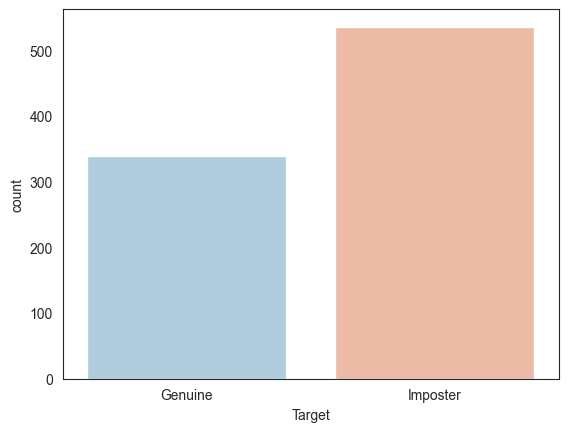

In [82]:
sns.countplot(x='Target',data=data,palette='RdBu_r')

In [83]:
features = list(data.columns[1:32])
# Convert feature columns to numeric, coercing errors to NaN
for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
# Drop rows with NaN values that resulted from conversion errors
data.dropna(inplace=True)

X = data[features]
y = data['Target']

train, test = train_test_split(data, test_size = 0.2, random_state=42) # Added random_state for reproducibility
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

[[67  5]
 [ 8 95]]


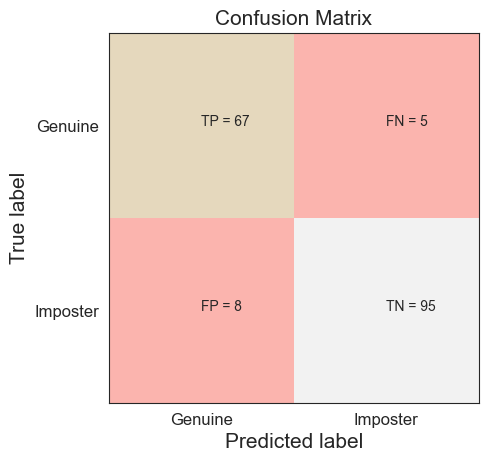

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

[0.9089017164264689, 0.8866109101868597, 0.9202890018731604, 0.8978584680625497, 0.9259233939881371, 0.9146577753609707, 0.9201557883427344, 0.9146577753609707, 0.9087494723916965, 0.8920355799812687, 0.8862857142857145, 0.8806709041898232, 0.8805208855053591, 0.8636956026429711, 0.8749142857142858]


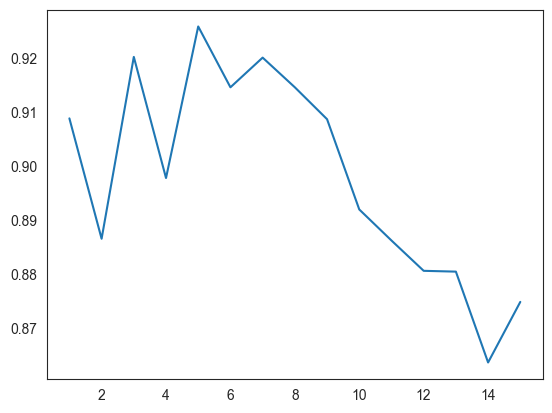

In [85]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))

plt.plot(kVals,f1_scores)
print(f1_scores)

In [86]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8915381473026553
Accuracy Score:  0.8914285714285715


In [87]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9885714285714285
Accuracy Score:  0.9885714285714285


In [88]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  1.0
Accuracy Score:  1.0


[0.9770917814579785, 0.9942914814369819, 0.9942795368882325, 1.0, 1.0, 1.0, 1.0, 1.0]


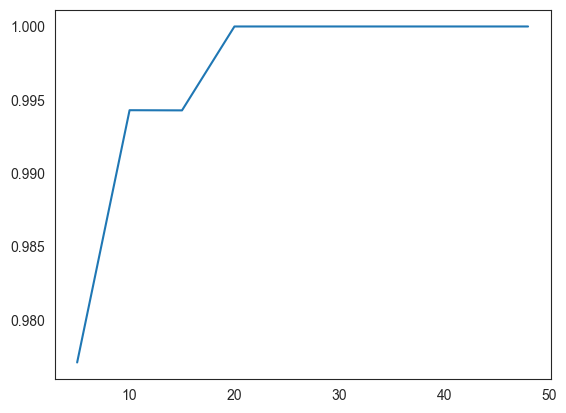

In [89]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,48]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))

plt.plot(estimators,f1_scores)
print(f1_scores)

In [90]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(estimator=cart, n_estimators=150, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9827978068963512
Accuracy Score:  0.9828571428571429


In [91]:
#ExtraTreeClassifier
num_trees = 80
max_features = 30
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  1.0
Accuracy Score:  1.0


In [92]:
# AdaBoostClassifier
seed = 7
num_trees = 100
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9942795368882325
Accuracy Score:  0.9942857142857143


In [93]:
seed = 7
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  1.0
Accuracy Score:  1.0


F1 Score:  0.9885458907289892
Accuracy Score:  0.9885714285714285
[[ 70   2]
 [  0 103]]


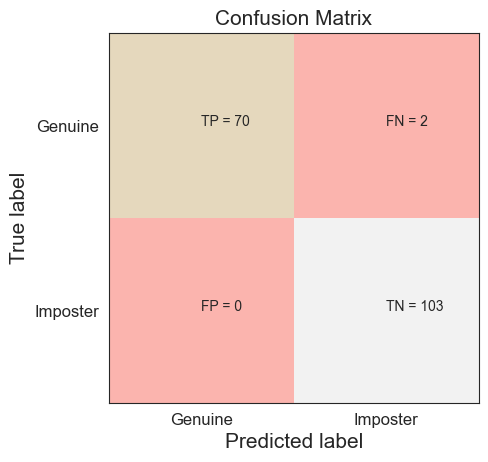

In [94]:
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=30)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=30)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

In [95]:
#MLPClassifier
net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train,y_train)
pred= net.predict(X_test)

print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9828386106646976
Accuracy Score:  0.9828571428571429


In [96]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [97]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca,y_train)
pred = knn.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9259233939881371
Accuracy Score:  0.9257142857142857


[0.9089017164264689, 0.8866109101868597, 0.9202890018731604, 0.9034952864394489, 0.9259233939881371, 0.9202890018731604, 0.9201557883427344, 0.9146577753609707, 0.9087494723916965, 0.8976571428571429, 0.8918998487905629, 0.8806709041898232, 0.8861271455330861, 0.8693062283983779, 0.8805208855053591]


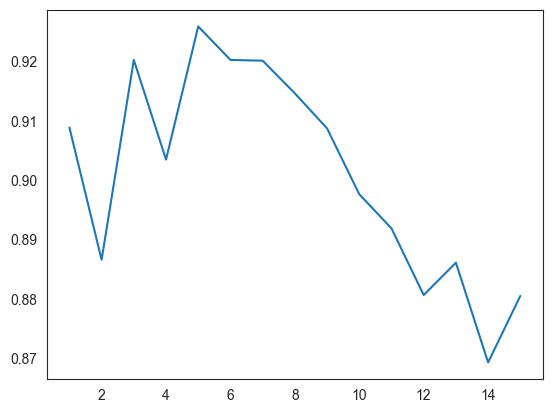

In [98]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    pred = knn.predict(X_test_pca)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))

plt.plot(kVals,f1_scores)
print(f1_scores)

In [99]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_pca,y_train)
pred = rf_classifier.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9482557975285311
Accuracy Score:  0.9485714285714286


In [100]:
#ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_features=5)
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9655510204081632
Accuracy Score:  0.9657142857142857


In [101]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#Version 13 imporvement
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=5)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=5)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_pca, y_train)
pred = ensemble.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8575449884387253
Accuracy Score:  0.8571428571428571


In [102]:
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train,y_train)
X_test_svd = svd.transform(X_test)

In [103]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_svd,y_train)
pred = knn.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9259233939881371
Accuracy Score:  0.9257142857142857


[0.9089017164264689, 0.8866109101868597, 0.9202890018731604, 0.8978584680625497, 0.9259233939881371, 0.9146577753609707, 0.9201557883427344, 0.9146577753609707, 0.9087494723916965, 0.8920355799812687, 0.8862857142857145, 0.8806709041898232, 0.8805208855053591, 0.8636956026429711, 0.8749142857142858]


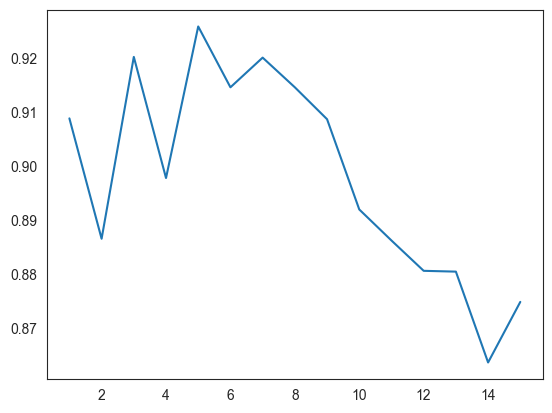

In [104]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_svd,y_train)
    pred = knn.predict(X_test_svd)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))

plt.plot(kVals,f1_scores)
print(f1_scores)

In [105]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_svd,y_train)
pred = rf_classifier.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9191423859263331
Accuracy Score:  0.92


In [106]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
model.fit(X_train_svd, y_train)
pred = model.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9252583742078782
Accuracy Score:  0.9257142857142857


In [107]:
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 21
Best features : Index(['DD.period.t', 'UD.period.t', 'H.t', 'UD.t.i', 'DD.i.e', 'H.e',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n',
       'H.n', 'DD.n.l', 'H.l', 'UD.l.Return'],
      dtype='object')


In [108]:
st  = "0.122,0.267,0.145,0.143,0.2,0.057,0.135,0.36,0.225,0.15,1.6,1.45,0.231,0.8,0.569,0.335,0.224,-0.111,0.167,0.247,0.08,0.127,0.232,0.105,0.168,0.312,0.144,0.28,0.2,-0.08,0.128)".replace(')', '') # Removed the trailing parenthesis
li = [float(x) for x in st.split(',')] # Ensure conversion to float

In [109]:
ar = np.array(li, dtype=np.float64) # Explicitly set dtype to float64
arr = ar.reshape(1,31)

In [110]:
arr.shape

(1, 31)

In [111]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
res = knn.predict(arr)

In [112]:
res[0]

'Imposter'

In [113]:
import pickle

# Assuming rf_classifier from the previous cells is the desired model
# If you ran the 'Ensemble Random Forest Classifier Fine Tunning' cell last,
# rf_classifier would be the model with the last estimator value (48).
# If you ran the 'Ensemble Random Forest Classifier' cell last, it would be n_estimators=100.
# Let's ensure we use the best one that achieved 0.9885714285714285 accuracy.

# Re-initialize and train the best performing Random Forest Classifier (n_estimators=100)
rf_classifier_best = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier_best.fit(X_train, y_train)

# Save the model to a pickle file
filename = 'random_forest_model.pkl'
pickle.dump(rf_classifier_best, open(filename, 'wb'))

print(f"Random Forest Classifier model saved as {filename}")

Random Forest Classifier model saved as random_forest_model.pkl
